## Kaggle Climate Change Challenge
**by Gireen Naidu October-2020 <br>**


### 1) Import Data

**a. Import Libraries <br>**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix


**b. Import Data Files <br>**

In [2]:
train_df = pd.read_csv(r"C:\Users\gnaidu\Downloads\Explore\Classification\Predict\train.csv")
test_df = pd.read_csv(r"C:\Users\gnaidu\Downloads\Explore\Classification\Predict\test.csv")

In [3]:
train_df.shape, test_df.shape

((15819, 3), (10546, 2))

In [4]:
#Check Columns and Data from train_df
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
#Check Columns and Data from test_df
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


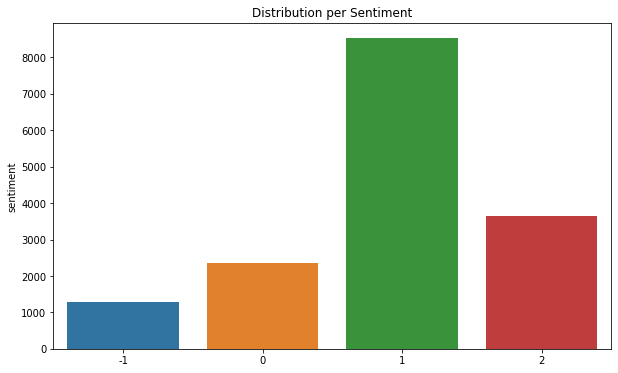

In [6]:
#checking sentiment distribution 
dist_class = train_df['sentiment'].value_counts()
labels = ['1', '2','0','-1']

fig, (ax1 )= plt.subplots(1, figsize=(10,6))

sns.barplot(x=dist_class.index, y=dist_class, ax=ax1).set_title("Distribution per Sentiment")
plt.show()

In [7]:
# var created to later split full_df into train_df and test_df  
# Concatenate train_df and test_df to create full_df
var = train_df.shape[0]
test_df['sentiment'] = [np.nan] * test_df.shape[0]
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [8]:
# Importing HTMLParser to remove HTML tags
from html.parser import HTMLParser
html_parser = HTMLParser()
full_df['clean_message'] = full_df['message'].apply(lambda x: html_parser.unescape(x))

In [9]:
# Converting full_df to lowercase
full_df['clean_message'] = full_df['clean_message'].apply(lambda x: x.lower())

In [10]:
# Removing punctuations
full_df['clean_message'] = full_df['clean_message'].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [11]:
#create dataframe 
#sample_df = full_df[:var]

In [12]:
y = full_df[:var]['sentiment']
df_train = full_df[:var]
df_test = full_df[var:]

In [13]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True, 
                             min_df=2, 
                             max_df=0.9, 
                             ngram_range=(1, 2))
    vector.fit(train_fit)
    return vector

In [14]:
tf_vector = get_feature_vector(np.array(df_train['message'].iloc[:]).ravel())
X = tf_vector.transform(np.array(df_train['message'].iloc[:]).ravel())
test_data = tf_vector.transform(np.array(df_test['message'] .iloc[:]).ravel())

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,  random_state=42)

In [16]:
LSVC_model = LinearSVC()
LSVC_model.fit(X_train, y_train)
y_predict_lr = LSVC_model.predict(X_test)
print(classification_report(y_test, y_predict_lr))
print("F1_SCORE - macro",round(f1_score(y_test, y_predict_lr, average="macro"),2))

              precision    recall  f1-score   support

        -1.0       0.74      0.44      0.55       259
         0.0       0.62      0.44      0.51       471
         1.0       0.77      0.88      0.82      1706
         2.0       0.79      0.79      0.79       728

    accuracy                           0.76      3164
   macro avg       0.73      0.64      0.67      3164
weighted avg       0.75      0.76      0.75      3164

F1_SCORE - macro 0.67


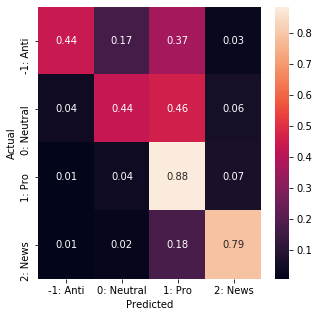

In [17]:
#Confusion Matrix Heatmap Normalised
labels = ['-1: Anti','0: Neutral', '1: Pro', '2: News']
cm = confusion_matrix(y_test, y_predict_lr)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f' , xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [18]:
# Kaggle Submission File 
y_pred = LSVC_model.predict(test_data).astype(int)
output = pd.DataFrame( data = {'tweetid': test_df['tweetid'], 'sentiment': y_pred })
output.to_csv(r"C:\Users\gnaidu\Downloads\Explore\Classification\Predict\Submission\Final_submission.csv", index = False)